In [2]:
%load_ext autoreload
%autoreload 2

import analysis
import MDAnalysis.analysis as mda
import numpy as np
import matplotlib.pyplot as plt

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[ 1  7 13 19]


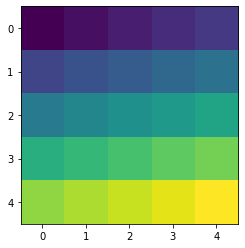

In [10]:
d = np.arange(0,25)
d = d.reshape(5,5)
print(d)

plt.imshow(d)
print(np.diagonal(d, offset=1))

In [2]:
t = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CONTACT-TEST2')

> Run Completed at 100.00% for LAF-1_RGG. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


In [3]:
# coords = t.structures[0].xyz*10.
# contacts_frame = np.empty(shape=(coords.shape[1], coords.shape[2]))
# for frame in range(coords.shape[0]):
#     cf = coords[frame,:,:]
#     contacts_frame += mda.contacts.contact_matrix(cf, radius=6)

In [ ]:
coords = t.structures[0].xyz*10.
contacts_frame = np.empty(shape=(coords.shape[1], coords.shape[1]))
for frame in range(800):
    print(f"{frame}/{coords.shape[0]}", end='\r')
    cf = coords[frame,:,:]
    contacts_frame += mda.distances.contact_matrix(cf, cutoff=6.)
contacts_frame = contacts_frame/50

In [ ]:
fig, ax =plt.figure(figsize=(16, 16))
img = plt.imshow(contacts_frame)
plt.colorbar(img)

Convert to chain blocks

In [ ]:
dd = np.zeros(shape=(t.chains, t.chains, t.chain_atoms, t.chain_atoms)) - 1

for c1 in range(t.chains):
    for c2 in range(t.chains):
        c1_slice = slice(c1*t.chain_atoms, (c1+1)*t.chain_atoms)
        c2_slice = slice(c2*t.chain_atoms, (c2+1)*t.chain_atoms)
        dd[c1,c2] = contacts_frame[c1_slice, c2_slice]
        
intra = np.diagonal(dd, axis1=0, axis2=1).mean(axis=2)
inter = np.zeros(shape=(t.chain_atoms, t.chain_atoms))
for chain in range(t.chains-1):
    inter += np.diagonal(dd, axis1=0, axis2=1, offset=chain+1).mean(axis=2)

plt.imshow(intra)
plt.figure()
plt.imshow(inter)

In [1]:
d = np.arange(1,100)
d.reshape(10,10)
plt.imshow(d)

NameError: name 'np' is not defined

In [ ]:
tr.unitcell

In [ ]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CONTACT-TEST2',
                  host='@perdiu41',
                  temper=False,
                  protein='LAF-1_RGG',
                  chains=100, 
                  model='HPS',
                  save=20000,
                  t=int(1e9),
                  use_random=True,
                  slab=True,
                  processors=4,
                  hps_scale=1.0,
                  temperatures=[250],
                  debye=0.1).write_hps_files(qsub=False, slurm=True)